
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing all the Necessary Library..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


There are some issue looking in a columns its show I think Key column will be in the first Columns inplace of Unnmaed columns.And i think there is two pick up date columns as well..

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.rename(columns={'Unnamed: 0':'Keys'},inplace=True)

In [7]:
df.drop(['key'] , inplace = True , axis=1)

In [8]:
df.isnull().sum()

Keys                 0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
def is_title(col) :
  return col.title()


df.columns = df.columns.map(is_title)

In [10]:
df['Pickup_Datetime'] = pd.to_datetime(df['Pickup_Datetime'])

In [11]:
df.dropna(inplace=True)

In [12]:
df.nunique()

Keys                 199999
Fare_Amount            1244
Pickup_Datetime      196628
Pickup_Longitude      71065
Pickup_Latitude       83835
Dropoff_Longitude     76894
Dropoff_Latitude      90585
Passenger_Count           8
dtype: int64

In [13]:
df['Year']  = df['Pickup_Datetime'].dt.year
df['Month'] = df['Pickup_Datetime'].dt.month_name()
df['Hour']  = df['Pickup_Datetime'].dt.hour
df['Day'] = df['Pickup_Datetime'].dt.day_name()

In [14]:
df.columns

Index(['Keys', 'Fare_Amount', 'Pickup_Datetime', 'Pickup_Longitude',
       'Pickup_Latitude', 'Dropoff_Longitude', 'Dropoff_Latitude',
       'Passenger_Count', 'Year', 'Month', 'Hour', 'Day'],
      dtype='object')

In [15]:
df['Hour'] = df['Hour'].replace(0,24)

In [16]:
def time_zone(col):
    i = col
    if i >= 7 and i < 12:
      return "Morning"
    elif i >= 12 and i < 17:
      return "Afternoon"
    elif i >= 17 and i < 22:
      return "Evening"
    else :
      return "Night"

df['Time_Zone'] = df.Hour.map(time_zone)

In [17]:
def haversin(lat1,lon1,lat2,lon2):
    R = 6373.0  # Radians Values..

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

df['Distance_Km']=haversin(df['Pickup_Latitude'],df['Pickup_Longitude'],df['Dropoff_Latitude'],df['Dropoff_Longitude'])

In [18]:
df.sample(5)

,Keys,Fare_Amount,Pickup_Datetime,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Month,Hour,Day,Time_Zone,Distance_Km
143300,28108115,8.1,2012-04-17 14:30:24+00:00,-73.980477,40.761456,-73.962632,40.776651,1,2012,April,14,Tuesday,Afternoon,2.261934
116702,19501483,20.0,2013-07-15 13:28:00+00:00,-74.011224,40.710613,-73.973424,40.754051,1,2013,July,13,Monday,Afternoon,5.787494
77468,49957649,15.5,2013-02-25 19:06:45+00:00,-73.994386,40.746009,-73.947709,40.779358,1,2013,February,19,Monday,Evening,5.405895
19483,54315445,6.5,2013-04-20 17:18:00+00:00,-73.980290,40.717146,-73.989085,40.716844,4,2013,April,17,Saturday,Evening,0.742229
5498,3794013,10.5,2010-04-09 12:07:07+00:00,-73.995283,40.733463,-73.993764,40.751736,1,2010,April,12,Friday,Afternoon,2.036530


In [19]:
print(f'Duplicated Values are {df.duplicated().sum()}')
df.head()

Duplicated Values are 0


,Keys,Fare_Amount,Pickup_Datetime,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Month,Hour,Day,Time_Zone,Distance_Km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,May,19,Thursday,Evening,1.683851
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,July,20,Friday,Evening,2.458361
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,August,21,Monday,Evening,5.037958
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,June,8,Friday,Morning,1.662205
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,August,17,Thursday,Evening,4.476855


In [20]:
df[['Fare_Amount' , 'Passenger_Count' , 'Year' , 'Hour' , 'Distance_Km']].describe()

,Fare_Amount,Passenger_Count,Year,Hour,Distance_Km
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,1.684543,2011.742434,14.432672,20.861897
std,9.901760,1.385995,1.856400,6.225603,383.084863
min,-52.000000,0.000000,2009.000000,1.000000,0.000000
25%,6.000000,1.000000,2010.000000,10.000000,1.215603
50%,8.500000,1.000000,2012.000000,15.000000,2.121658
75%,12.500000,2.000000,2013.000000,20.000000,3.876386
max,499.000000,208.000000,2015.000000,24.000000,16414.390364


In [21]:
df = df[df['Distance_Km'] != 0]

So there is no column with 0 distance_km as well.

In [22]:
# Seeing the Latitude and Longitude COlumns as well..which contain 0 values..
df = df[(df['Pickup_Latitude'] != 0) & (df['Pickup_Longitude'] != 0) & (df['Dropoff_Latitude'] != 0) & (df['Dropoff_Longitude'] != 0)]

# Remove all the Value that are Containing 0 in their Latitude and Longitude Columns as well..

In [23]:
# See the OverView of the Top Values
df = df[df['Passenger_Count'] != 0]
df["Passenger_Count"].value_counts()

Passenger_Count
1      134212
2       28579
5       13569
3        8633
6        4159
4        4148
208         1
Name: count, dtype: int64

Here i Will remove all the unwanted values from the data..Here our data will almost clean and not contain any anamolies itself..

In [24]:
# There is one person or row that contain Passenger_Count = 208 so we simply remove that row because its wrong data..
# Before removing DataSet Size => (193301, 14)
df = df[df['Passenger_Count'] != 208]

In [25]:
df.drop('Pickup_Datetime', inplace=True, axis = 1)

# Starting EDA [Exploratory Data Analysis]

### Uni-Variate Analysis

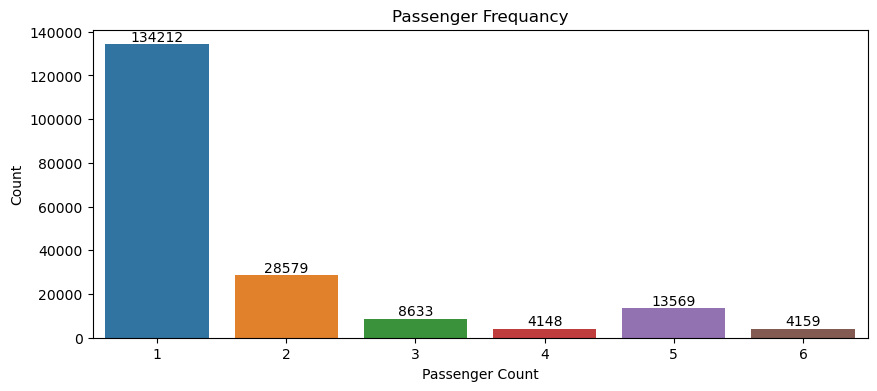

In [26]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df['Passenger_Count'] , data = df)
plt.title('Passenger Frequancy')
plt.xlabel('Passenger Count')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

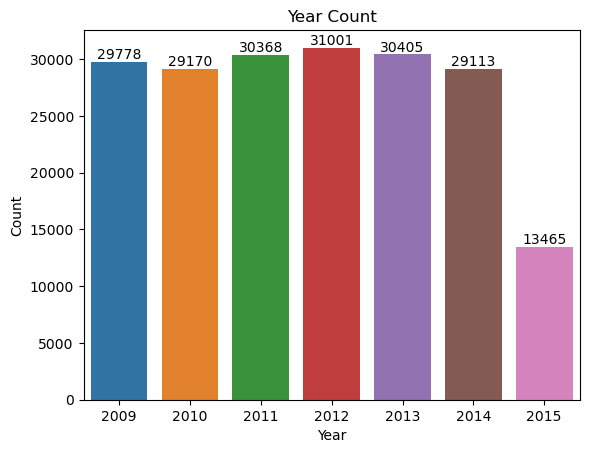

In [27]:
# See the Order Counts in a Year in a Month or in a Hour as well one by one..
ax = sns.countplot(x = df['Year'] , data = df)
plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

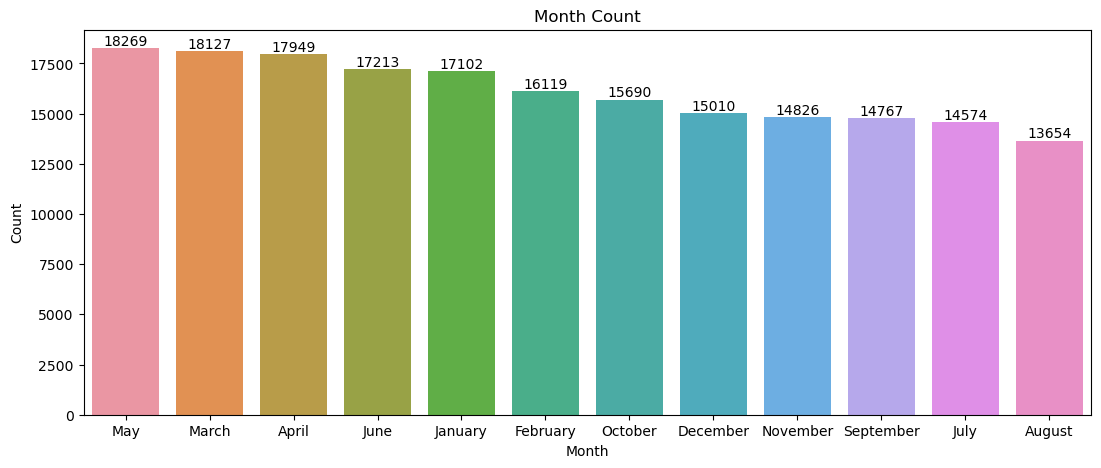

In [28]:
# See the Frequency of Order in Each Month..
plt.figure(figsize=(13,5))
ax = sns.countplot(x = df['Month'] , data = df , order=df['Month'].value_counts().index)
plt.title('Month Count')
plt.xlabel('Month')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

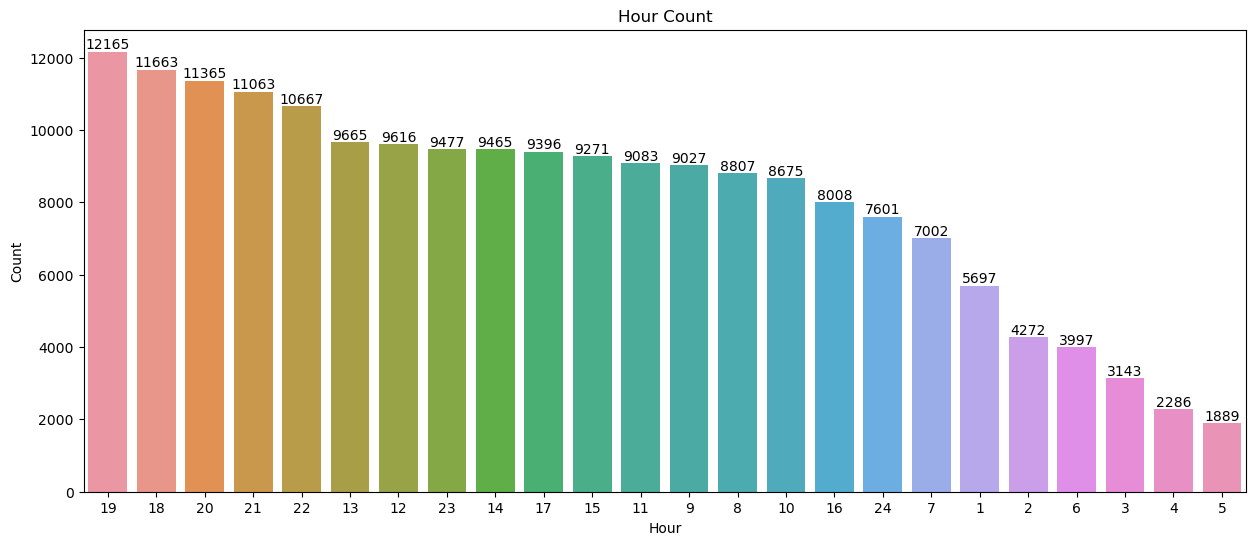

In [29]:
# See the Order Count in a Hour Times..
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Hour'] , data = df , order = df['Hour'].value_counts().index )
plt.title('Hour Count')
plt.xlabel('Hour')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

There are three patch according to me in which time we get the most number of order first patch time was [18,19,20,21,22] and second batch was [13,12,23,14,17,15,11,9] and third batch was [8,10,16,24,7] and remaining time we get the order but not as much..

<Axes: xlabel='Hour', ylabel='Density'>

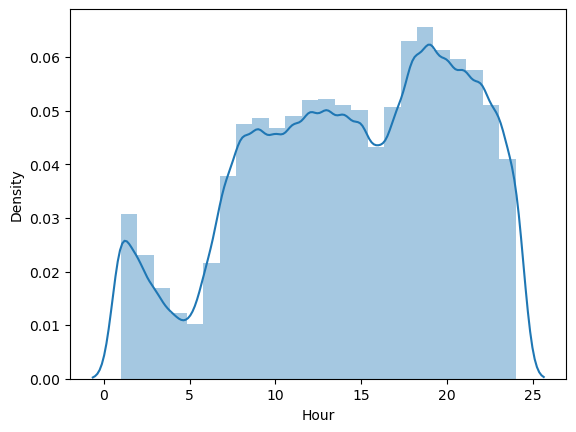

In [30]:
# Trying to see the Order in the DistPlot..
sns.distplot(df['Hour'] , bins = 24 )

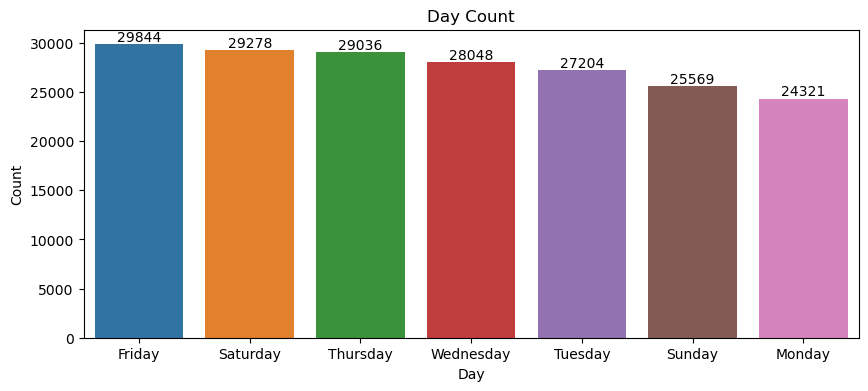

In [31]:
# See the Day Wise Numbers of Orders.
plt.figure(figsize = (10,4))
ax = sns.countplot(x = df['Day'] , data = df,order = df['Day'].value_counts().index)
plt.title('Day Count')
plt.xlabel('Day')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

We get the Least numbers of Order on Sunday and Monday .. Sunday is Obvious becuase these was a holiday but on Monday we also getting least order and get the most number of order from Tuesday to Friday.

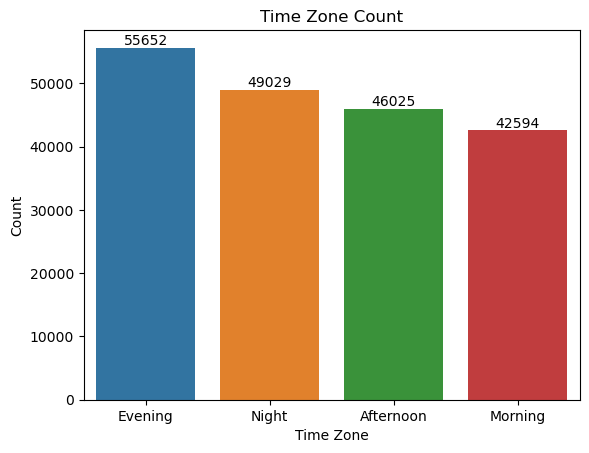

In [32]:
# See the Time Wise Order Frequnecy ..
ax = sns.countplot(x = df['Time_Zone'] , data = df , order = df['Time_Zone'].value_counts().index)
plt.title('Time Zone Count')
plt.xlabel('Time Zone')
plt.ylabel('Count')

for i in ax.containers:
  ax.bar_label(i)

so we seen we get the least number of ride in the morning according to dataset.

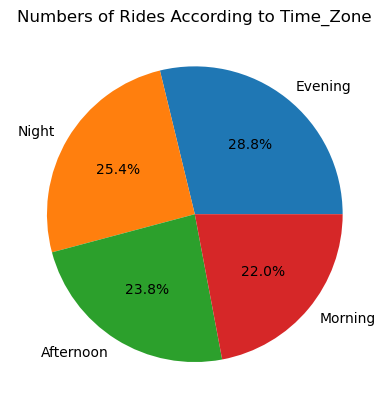

In [33]:
# We can also see the Time Distribution in the Pie Chart ...
plt.pie(df['Time_Zone'].value_counts().values , autopct='%1.1f%%' , labels = df['Time_Zone'].value_counts().index)
plt.title('Numbers of Rides According to Time_Zone')
plt.show()

In [34]:
# Seeing the Distance Columns As Well..
df['Distance_Km'].sort_values(ascending=False)

75851     16414.390364
139447    10324.747814
70889      8670.414162
129303     8588.024373
52972      6034.069836
              ...     
14116         0.000084
42732         0.000084
119189        0.000084
163148        0.000084
1531          0.000084
Name: Distance_Km, Length: 193300, dtype: float64

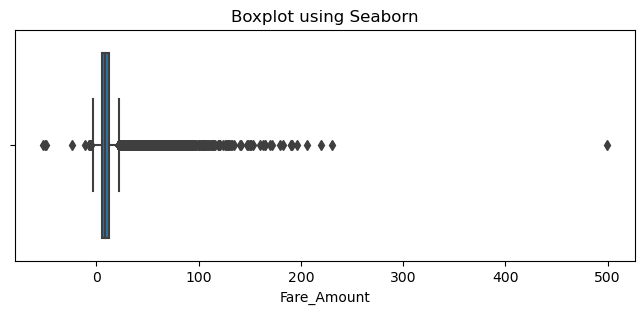

In [35]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Fare_Amount', data=df)
plt.title('Boxplot using Seaborn')
plt.show()

In [36]:
df['Fare_Amount'].describe()

count    193300.000000
mean         11.352817
std           9.744598
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: Fare_Amount, dtype: float64

In [37]:
lower_percentile = 1
upper_percentile = 99

# Calculate the lower and upper bounds
lower_bound_distance = df['Distance_Km'].quantile(lower_percentile / 100)
upper_bound_distance = df['Distance_Km'].quantile(upper_percentile / 100)

lower_bound_fare = df['Fare_Amount'].quantile(lower_percentile / 100)
upper_bound_fare = df['Fare_Amount'].quantile(upper_percentile / 100)

# Apply capping using clip
df['Distance_Km'] = df['Distance_Km'].clip(lower=lower_bound_distance, upper=upper_bound_distance)
df['Fare_Amount'] = df['Fare_Amount'].clip(lower=lower_bound_fare, upper=upper_bound_fare)


In [38]:
lower_percentile = 1
upper_percentile = 99

# Calculate the lower and upper bounds
lower_bound_distance = df['Distance_Km'].quantile(lower_percentile / 100)
upper_bound_distance = df['Distance_Km'].quantile(upper_percentile / 100)

lower_bound_fare = df['Fare_Amount'].quantile(lower_percentile / 100)
upper_bound_fare = df['Fare_Amount'].quantile(upper_percentile / 100)

# Apply capping using clip
df['Distance_Km'] = df['Distance_Km'].clip(lower=lower_bound_distance, upper=upper_bound_distance)
df['Fare_Amount'] = df['Fare_Amount'].clip(lower=lower_bound_fare, upper=upper_bound_fare)



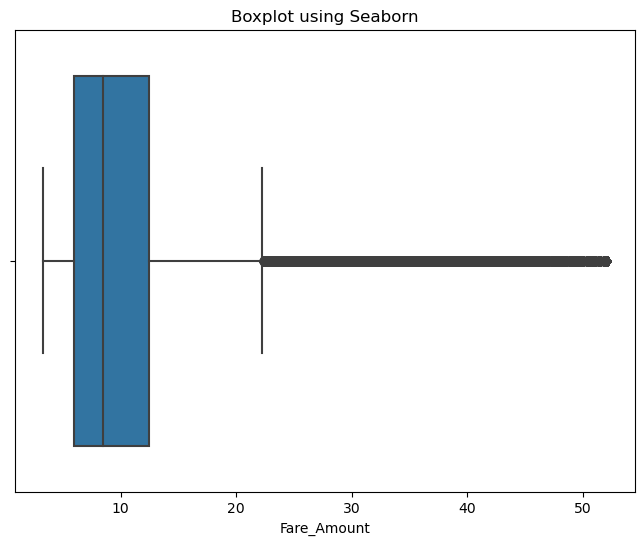

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare_Amount', data=df)
plt.title('Boxplot using Seaborn')
plt.show()

In [40]:
# df[['Distance_Km_capped', 'Fare_Amount_capped']].describe()

In [41]:
df_dum = pd.get_dummies(df[['Time_Zone', 'Day', 'Month']], dtype=int)

In [42]:
df_dum

,Time_Zone_Afternoon,Time_Zone_Evening,Time_Zone_Morning,Time_Zone_Night,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
199996,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199997,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193300 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Keys               193300 non-null  int64  
 1   Fare_Amount        193300 non-null  float64
 2   Pickup_Longitude   193300 non-null  float64
 3   Pickup_Latitude    193300 non-null  float64
 4   Dropoff_Longitude  193300 non-null  float64
 5   Dropoff_Latitude   193300 non-null  float64
 6   Passenger_Count    193300 non-null  int64  
 7   Year               193300 non-null  int32  
 8   Month              193300 non-null  object 
 9   Hour               193300 non-null  int32  
 10  Day                193300 non-null  object 
 11  Time_Zone          193300 non-null  object 
 12  Distance_Km        193300 non-null  float64
dtypes: float64(6), int32(2), int64(2), object(3)
memory usage: 19.2+ MB


In [44]:
df.head()

,Keys,Fare_Amount,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Passenger_Count,Year,Month,Hour,Day,Time_Zone,Distance_Km
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,May,19,Thursday,Evening,1.683851
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,July,20,Friday,Evening,2.458361
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,August,21,Monday,Evening,5.037958
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,June,8,Friday,Morning,1.662205
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,August,17,Thursday,Evening,4.476855


In [45]:
df.drop(df[['Time_Zone', 'Day', 'Month', 'Pickup_Longitude', 'Pickup_Latitude', 'Dropoff_Longitude', 'Dropoff_Latitude']], axis = 1, inplace = True)

In [46]:
df = pd.concat([df, df_dum], axis = 1)

In [47]:
df.head()

,Keys,Fare_Amount,Passenger_Count,Year,Hour,Distance_Km,Time_Zone_Afternoon,Time_Zone_Evening,Time_Zone_Morning,Time_Zone_Night,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,24238194,7.5,1,2015,19,1.683851,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,27835199,7.7,1,2009,20,2.458361,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,44984355,12.9,1,2009,21,5.037958,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25894730,5.3,3,2009,8,1.662205,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,17610152,16.0,5,2014,17,4.476855,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_x = df.drop('Fare_Amount' , axis = 1)

In [49]:
df_y = df['Fare_Amount']

In [50]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193300 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Keys                 193300 non-null  int64  
 1   Passenger_Count      193300 non-null  int64  
 2   Year                 193300 non-null  int32  
 3   Hour                 193300 non-null  int32  
 4   Distance_Km          193300 non-null  float64
 5   Time_Zone_Afternoon  193300 non-null  int32  
 6   Time_Zone_Evening    193300 non-null  int32  
 7   Time_Zone_Morning    193300 non-null  int32  
 8   Time_Zone_Night      193300 non-null  int32  
 9   Day_Friday           193300 non-null  int32  
 10  Day_Monday           193300 non-null  int32  
 11  Day_Saturday         193300 non-null  int32  
 12  Day_Sunday           193300 non-null  int32  
 13  Day_Thursday         193300 non-null  int32  
 14  Day_Tuesday          193300 non-null  int32  
 15  Day_Wednesday        1

In [51]:
df_y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.3
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: Fare_Amount, Length: 193300, dtype: float64

In [52]:
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import datetime as dt, warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 15)

In [55]:
regression = LinearRegression()
regression

LinearRegression()

In [56]:
df['Distance_Km'] = df['Distance_Km'].astype(int)
df['Fare_Amount'] = df['Fare_Amount'].astype(int)

In [57]:
df.dtypes

Keys                   int64
Fare_Amount            int32
Passenger_Count        int64
Year                   int32
Hour                   int32
Distance_Km            int32
Time_Zone_Afternoon    int32
Time_Zone_Evening      int32
Time_Zone_Morning      int32
Time_Zone_Night        int32
Day_Friday             int32
Day_Monday             int32
Day_Saturday           int32
Day_Sunday             int32
Day_Thursday           int32
Day_Tuesday            int32
Day_Wednesday          int32
Month_April            int32
Month_August           int32
Month_December         int32
Month_February         int32
Month_January          int32
Month_July             int32
Month_June             int32
Month_March            int32
Month_May              int32
Month_November         int32
Month_October          int32
Month_September        int32
dtype: object

In [58]:
model = regression.fit(x_train, y_train)

In [59]:
y_train_pred = regression.predict(x_train)

In [60]:
print("Value of MAE : ", mean_absolute_error(y_train, y_train_pred))
print("Value of MSE : ", mean_squared_error(y_train, y_train_pred))
print("R2 Error: ", r2_score(y_train, y_train_pred))

Value of MAE :  2.1304500483985813
Value of MSE :  15.621867989665299
R2 Error:  0.8051097738982113


In [61]:
y_test_pred = regression.predict(x_test)

In [62]:
print("Value of MAE : ", mean_absolute_error(y_test, y_test_pred))
print("Value of MSE : ", mean_squared_error(y_test, y_test_pred))
print("R2 Error: ", r2_score(y_test, y_test_pred))

Value of MAE :  2.108914551749763
Value of MSE :  15.280741024061024
R2 Error:  0.8073624833996205


In [63]:
from xgboost import XGBRegressor

In [64]:
model_2 = XGBRegressor()

In [65]:
model_2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_train_pred = model_2.predict(x_train)

In [67]:
print("Value of MAE : ", mean_absolute_error(y_train, y_train_pred))
print("Value of MSE : ", mean_squared_error(y_train, y_train_pred))
print("R2 Error: ", r2_score(y_train, y_train_pred))

Value of MAE :  1.8396473581237796
Value of MSE :  10.588157956920035
R2 Error:  0.8679076983885197


In [68]:
y_test_pred = model_2.predict(x_test)

In [69]:
print("Value of MAE : ", mean_absolute_error(y_test, y_test_pred))
print("Value of MSE : ", mean_squared_error(y_test, y_test_pred))
print("R2 Error: ", r2_score(y_test, y_test_pred))

Value of MAE :  1.9687782733371006
Value of MSE :  13.42415051185989
R2 Error:  0.8307676955585793
